# Conditional VAE

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
# import tensorflow as tf

In [11]:
import numpy as np
from model import CVAE_CNN3
from util import mnist_loader, shape_2d

In [3]:
mnist, size = mnist_loader()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Visualize Reconstructed images
- run `python train.py` to save model

In [31]:
# load model
network_architecture = dict(n_input=[28, 28, 1], n_z=20)
# model_100 = CVAE_CNN3(10, network_architecture=network_architecture, load_model="./log/cvae_cnn3/progress-100-model.ckpt")
model = CVAE_CNN3(10, network_architecture=network_architecture, load_model="./log/cvae_cnn3/model.ckpt")

INFO:tensorflow:Restoring parameters from ./log/cvae_cnn3/model.ckpt


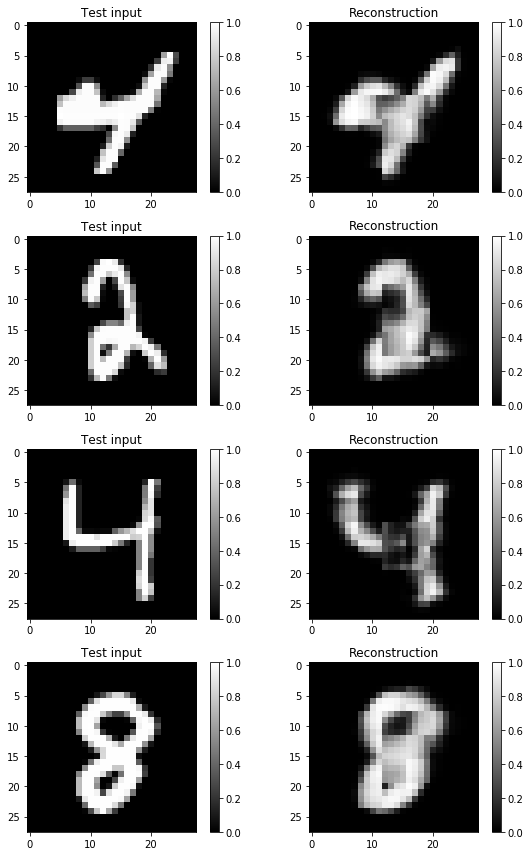

In [33]:
# feed test data and reconstruct
_x, _y = mnist.test.next_batch(model.batch_size)
_x = shape_2d(_x, model.batch_size)
reconstruction = model.reconstruct(_x, _y)

# plot
plt.figure(figsize=(8, 12))
_n = 4
for i in range(_n):
    plt.subplot(_n, 2, 2*i + 1)
    plt.imshow(_x[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Test input")
    plt.colorbar()
    plt.subplot(_n, 2, 2*i + 2)
    plt.imshow(reconstruction[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Reconstruction")
    plt.colorbar()
plt.tight_layout()

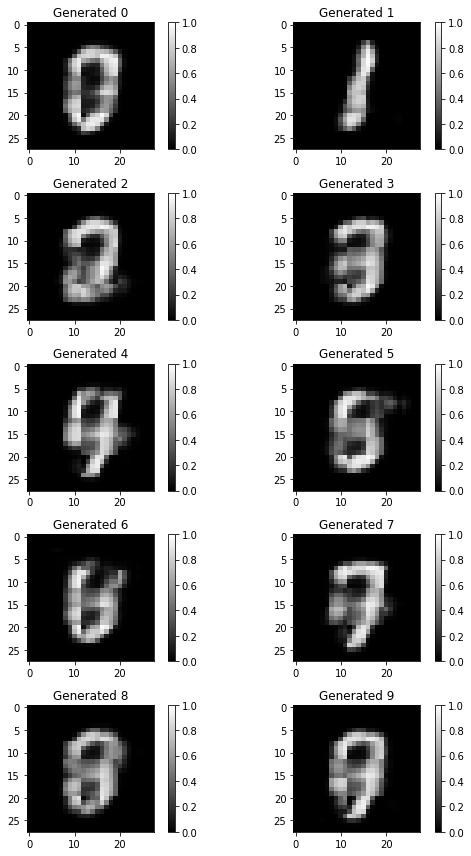

In [17]:
# convert label to one hot vector
target_vector = [i for i in range(model.label_size)]
o_h = np.eye(model.label_size)[target_vector]
true_label = np.tile(o_h, reps=[int(model.batch_size/model.label_size), 1])

generated = model.decode(true_label, std=0.0005)
plt.figure(figsize=(8, 12))
for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.imshow(generated[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Generated %i" % np.argmax(true_label[i]))
    plt.colorbar()
plt.tight_layout()

## Visualize latent space
- to see this, run CVAE with 2 latent dimension

INFO:tensorflow:Restoring parameters from ./log/cvae_cnn3_2d/model.ckpt


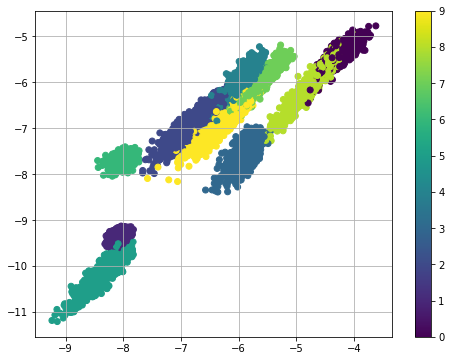

In [29]:
# load model
network_architecture = dict(n_input=[28, 28, 1], n_z=2)
model_2d = CVAE_CNN3(10, network_architecture=network_architecture, load_model="./log/cvae_cnn3_2d/model.ckpt")

# generate latent vector
# since the network's batch size is fixed, generation is executed by iteration

_n = 10000
flg = int(_n/model.batch_size)
cnt = 0
y, z = [], []
while cnt < _n:
    _x, _y = mnist.train.next_batch(model.batch_size)
    _x = shape_2d(_x, model.batch_size)
    z_mu = model_2d.encode(_x, _y)
    z.append(z_mu)
    y.append(_y)
    cnt += model.batch_size
z = np.vstack(z)
y = np.vstack(y)

# plot
plt.figure(figsize=(8, 6)) 
plt.scatter(z[:, 0], z[:, 1], c=np.argmax(y, 1))
plt.colorbar()
plt.grid()

## Visualize CVAE with 2 CNN

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Restoring parameters from ./log/cvae_cnn2/model.ckpt


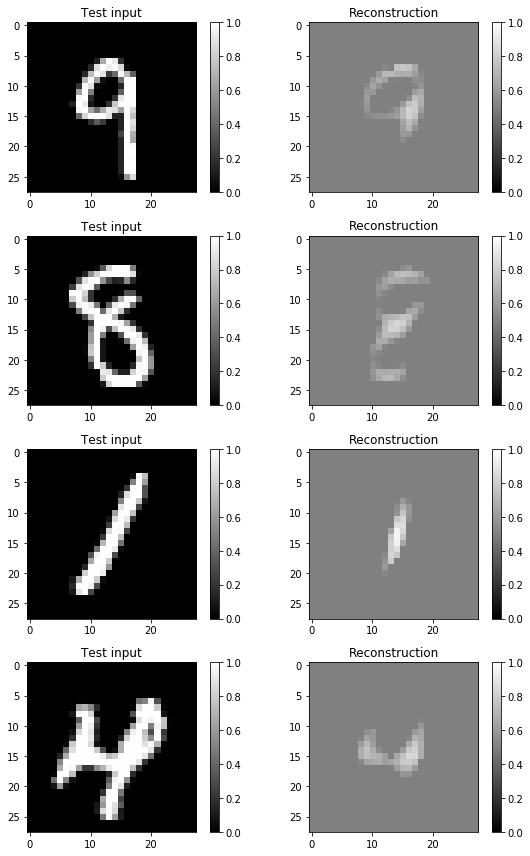

In [35]:
from model import CVAE_CNN2

mnist, size = mnist_loader()

# load model
network_architecture = dict(n_input=[28, 28, 1], n_z=20)
model = CVAE_CNN2(10, network_architecture=network_architecture, load_model="./log/cvae_cnn2/model.ckpt")

# feed test data and reconstruct
_x, _y = mnist.test.next_batch(model.batch_size)
_x = shape_2d(_x, model.batch_size)
reconstruction = model.reconstruct(_x, _y)

# plot
plt.figure(figsize=(8, 12))
_n = 4
for i in range(_n):
    plt.subplot(_n, 2, 2*i + 1)
    plt.imshow(_x[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Test input")
    plt.colorbar()
    plt.subplot(_n, 2, 2*i + 2)
    plt.imshow(reconstruction[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Reconstruction")
    plt.colorbar()
plt.tight_layout()